# **Salary Prediction with linear regression**

In [2]:
#Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
#import dataset
salary_df = pd.read_csv('Salary_Data.csv')
salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


### Exploratory Data Analysis & Data visualization

In [4]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [5]:
salary_df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


<Axes: xlabel='Education Level', ylabel='Salary'>

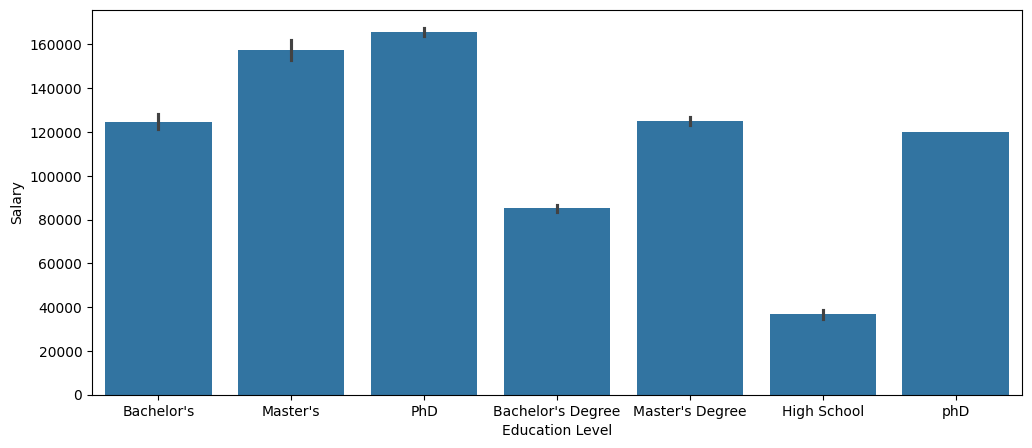

In [6]:
plt.figure(figsize=(12, 5))
sns.barplot(x="Education Level", y='Salary', data=salary_df)

<Axes: xlabel='Gender', ylabel='Salary'>

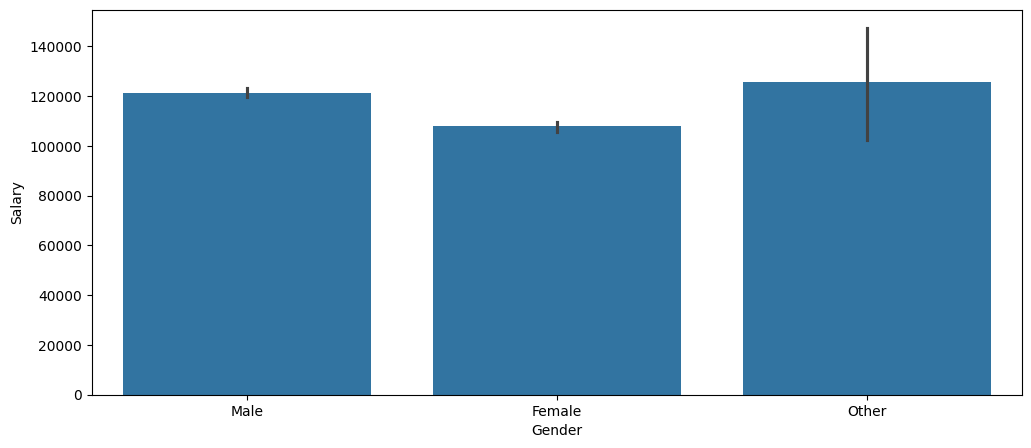

In [7]:
plt.figure(figsize=(12, 5))
sns.barplot(x="Gender", y='Salary', data=salary_df)

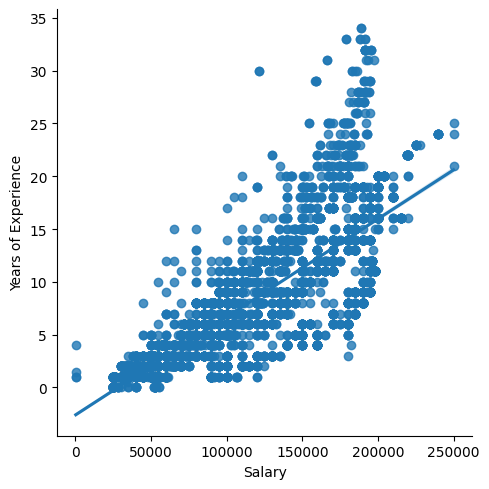

In [8]:
sns.lmplot(x='Salary', y='Years of Experience', data=salary_df)

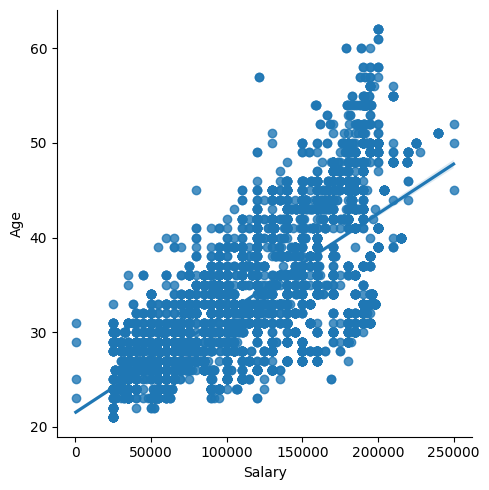

In [9]:
sns.lmplot(x='Salary', y='Age', data=salary_df)

### Cleaning Data

In [10]:
#Checking and drop null values
salary_df.shape

(6704, 6)

In [11]:
salary_df.isna().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [12]:
salary_df = salary_df.dropna()

In [13]:
salary_df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [14]:
salary_df.shape

(6698, 6)

In [15]:
#Delete row where gender is 'Other'
salary_mod  = salary_df[salary_df['Gender'] != 'Other']

In [16]:
salary_mod['Gender'].unique()

array(['Male', 'Female'], dtype=object)

<Axes: xlabel='Gender', ylabel='Salary'>

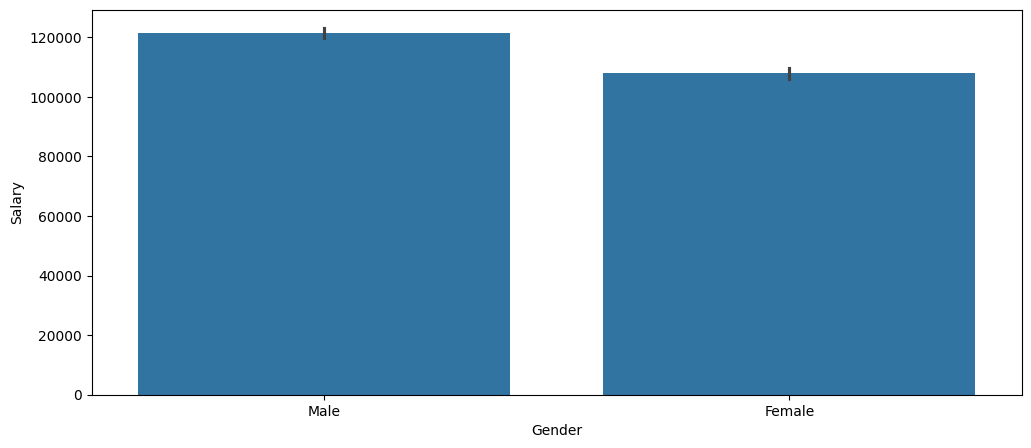

In [17]:
plt.figure(figsize=(12, 5))
sns.barplot(x="Gender", y='Salary', data=salary_mod)

In [18]:
#Replace Education Level Data
dict_replace = {
    "phD":"PhD",
    "Master's Degree":"Master's",
    "Bachelor's Degree":"Bachelor's"
}
salary_mod = salary_mod.replace(dict_replace)
salary_mod['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', 'High School'], dtype=object)

<Axes: xlabel='Education Level', ylabel='Salary'>

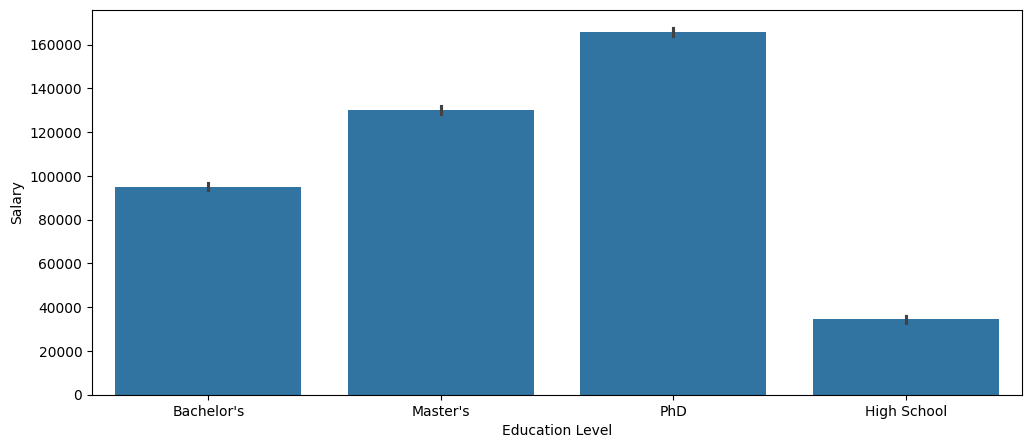

In [19]:
plt.figure(figsize=(12, 5))
sns.barplot(x="Education Level", y='Salary', data=salary_mod)

### Encoding Data

In [20]:
#Encoding Data
salary_mod['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [21]:
Genders = ['Male', 'Female']

In [22]:
from sklearn.preprocessing import OrdinalEncoder

In [23]:
salary_mod.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [24]:
enc = OrdinalEncoder(categories=[Genders])

In [25]:
enc.fit_transform(salary_mod[['Gender']])
#Male = 0
#Female = 1

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [0.],
       [1.]])

In [26]:
salary_mod['Gender'] = enc.fit_transform(salary_mod[['Gender']])
salary_mod.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,0.0,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,1.0,Master's,Data Analyst,3.0,65000.0
2,45.0,0.0,PhD,Senior Manager,15.0,150000.0
3,36.0,1.0,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,0.0,Master's,Director,20.0,200000.0


In [27]:
salary_mod['Gender'].unique()

array([0., 1.])

In [28]:
salary_mod['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', 'High School'], dtype=object)

In [29]:
Educations = ["Bachelor's", "Master's", "PhD", "High School"]

In [30]:
enc2 = OrdinalEncoder(categories=[Educations])

In [31]:
enc2.fit_transform(salary_mod[['Education Level']])
#Bachelor's = 0
#Master's = 1
#Phd = 2
#High School = 3

array([[0.],
       [1.],
       [2.],
       ...,
       [0.],
       [1.],
       [3.]])

In [32]:
salary_mod['Education Level'] = enc2.fit_transform(salary_mod[['Education Level']])
salary_mod.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,0.0,0.0,Software Engineer,5.0,90000.0
1,28.0,1.0,1.0,Data Analyst,3.0,65000.0
2,45.0,0.0,2.0,Senior Manager,15.0,150000.0
3,36.0,1.0,0.0,Sales Associate,7.0,60000.0
4,52.0,0.0,1.0,Director,20.0,200000.0


In [33]:
salary_mod['Education Level'].unique()

array([0., 1., 2., 3.])

In [34]:
#Drop Column
salary_mod = salary_mod[['Age', 'Gender', "Education Level", "Years of Experience", "Salary"]]
salary_mod.head()

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,0.0,0.0,5.0,90000.0
1,28.0,1.0,1.0,3.0,65000.0
2,45.0,0.0,2.0,15.0,150000.0
3,36.0,1.0,0.0,7.0,60000.0
4,52.0,0.0,1.0,20.0,200000.0


### Split Data

In [35]:
feature = ['Age', 'Gender', "Education Level", "Years of Experience"]

X = salary_mod[feature]
y = salary_mod['Salary']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Build and train model

In [37]:
LinReg = LinearRegression()

In [38]:
LinReg.fit(X_train, y_train)

LinearRegression()

### Predict & Model Evaluation

In [39]:
print(X_test)

       Age  Gender  Education Level  Years of Experience
3106  26.0     0.0              1.0                  3.0
5844  34.0     0.0              2.0                 11.0
1454  27.0     0.0              0.0                  3.0
5946  32.0     0.0              0.0                  7.0
6090  40.0     1.0              0.0                 16.0
...    ...     ...              ...                  ...
1758  27.0     0.0              0.0                  3.0
809   28.0     1.0              0.0                  5.0
464   29.0     0.0              0.0                  4.0
881   27.0     0.0              0.0                  4.0
6672  32.0     0.0              3.0                  3.0

[1337 rows x 4 columns]


In [40]:
y_pred = LinReg.predict(X_test)

In [41]:
print(y_pred)

[ 84239.39956954 142632.67161357  83829.35359206 ...  89497.30943454
  93108.61781359  70614.25800833]


In [42]:
LinReg.score(X_test, y_test)

0.6718403141390971

In [43]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

MAE: 24086.979402462905
MSE: 911926692.6519114
R²: 0.6718403141390971


### Visualize Result

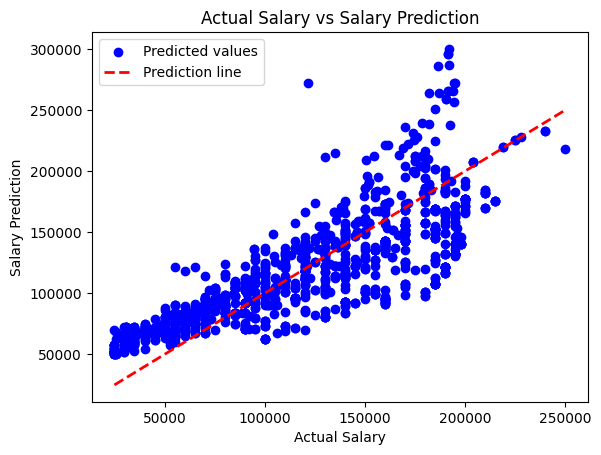

In [44]:
# Plotting the actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predicted values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Prediction line')
plt.xlabel('Actual Salary')
plt.ylabel('Salary Prediction')
plt.title('Actual Salary vs Salary Prediction')
plt.legend()
plt.show()